In [1]:
# import dependencies
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import scattertext as st
import spacy
nlp = spacy.load('en_core_web_md')
from IPython.display import IFrame
from IPython.core.display import display, HTML
from pprint import pprint

# Data Cleaning and Transformation

In [2]:
# import the data and view it
wine_df = pd.read_csv("../output_data/final_wine_data_172k.csv")
wine_df.head()

,Unnamed: 0,country,description,price,points,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,87,Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",14.0,87,Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,87,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",65.0,87,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,15.0,87,Tempranillo-Merlot,Tandem


In [3]:
# drop the unnecessary column and view it
wine_df = wine_df.drop("Unnamed: 0", axis = 1)
wine_df.head()

,country,description,price,points,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,87,Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",14.0,87,Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,87,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",65.0,87,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,15.0,87,Tempranillo-Merlot,Tandem


In [4]:
# Get the sentiment score for each description using Textblob
wine_df["sentiment"] = wine_df["description"].map(lambda text: TextBlob(text).sentiment.polarity)

# Get the reveiw length of the descriptions
wine_df["length"] = wine_df["description"].apply(lambda x: len(x))

# get the word count of the descriptions
wine_df["word_count"] = wine_df["description"].apply(lambda x: len(str(x).split()))

wine_df.head()

,country,description,price,points,variety,winery,sentiment,length,word_count
0,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,87,Portuguese Red,Quinta dos Avidagos,0.220000,227,38
1,US,"Tart and snappy, the flavors of lime flesh and...",14.0,87,Pinot Gris,Rainstorm,0.025000,186,28
2,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,87,Riesling,St. Julian,0.166667,199,33
3,US,"Much like the regular bottling from 2012, this...",65.0,87,Pinot Noir,Sweet Cheeks,0.306667,249,41
4,Spain,Blackberry and raspberry aromas show a typical...,15.0,87,Tempranillo-Merlot,Tandem,0.026667,261,42


# Initial Data Discovery

In [5]:
# find the minimum sentiment scores
wine_df["sentiment"].min()

-0.8

In [6]:
# print out the wines with the lowest sentiment score
wine_df.loc[wine_df.sentiment == -0.8]

,country,description,price,points,variety,winery,sentiment,length,word_count
114047,US,"Touches of soy, cedar and smoked meat enhance ...",25.0,89,Cabernet Sauvignon,Lucas & Lewellen,-0.8,260,46


In [7]:
# find the maximum sentiment scores
wine_df["sentiment"].max()

1.0

In [8]:
# print out the wines with the highest sentimental score
wine_df.loc[wine_df.sentiment == 1.0]

,country,description,price,points,variety,winery,sentiment,length,word_count
1268,France,"Produced from organic grapes, the wine is ripe...",30.0,90,Rosé,Domaine Sainte-Marie,1.0,210,37
2952,Argentina,This blend of 88% Cabernet Sauvignon and 12% C...,30.0,86,Cabernet Blend,Viña Alicia,1.0,190,33
4394,US,"Anchored in fig, plum and berry fruit, this is...",20.0,87,Pinot Noir,Silvan Ridge,1.0,206,35
9445,US,"Anchored in fig, plum and berry fruit, this is...",20.0,87,Pinot Noir,Silvan Ridge,1.0,206,35
12320,France,"Ripe and fruity, this is a wine made for drink...",18.0,89,Bordeaux-style Red Blend,Château de Nardon,1.0,163,28
14194,Australia,"A bit softer, plusher and creamier than the Sh...",40.0,92,Shiraz,Henry's Drive Vignerons,1.0,231,36
16490,US,"The winery's flagship offering, this wine is a...",45.0,92,Rhône-style Red Blend,Syncline,1.0,283,47
16884,US,"Aromas of vanilla, cherry and cola start this ...",17.0,85,Cabernet Franc,Cooper Vineyards,1.0,208,35
23106,Italy,"There's a buttery, creamy banana feeling to th...",15.0,88,Pinot Grigio,Mezzacorona,1.0,217,33
24820,US,This wine opens with aromas of apricot and pea...,36.0,90,White Blend,Hedges,1.0,132,23


# Univariate visualization / Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e6f7f98>]],
      dtype=object)

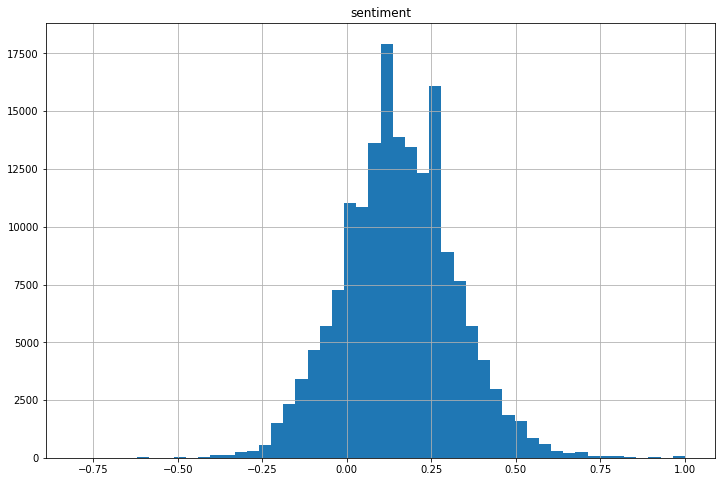

In [11]:
# Get the distribution of sentiment scores for description
wine_df.hist(column="sentiment", bins = 50, figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e77fc88>]],
      dtype=object)

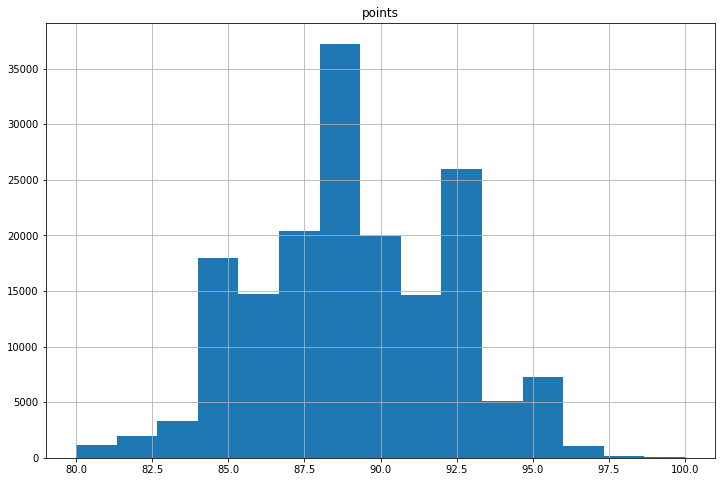

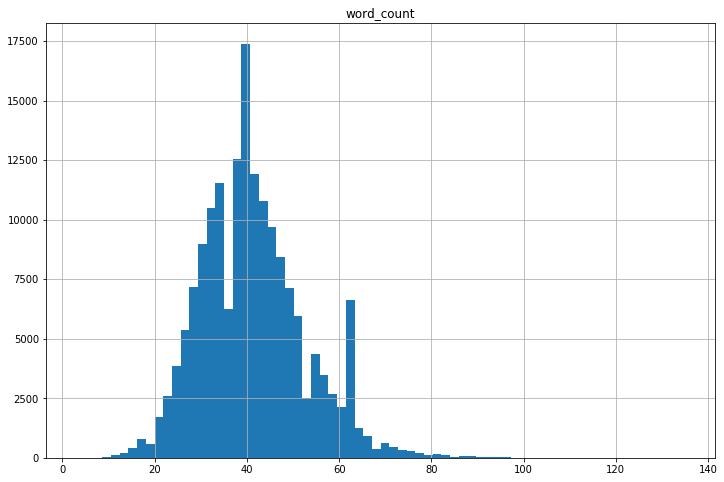

In [12]:
# distirbtuion of points and word count
wine_df.hist(column="points", bins = 15, figsize = (12,8))
wine_df.hist(column="word_count", bins = 70, figsize = (12,8))

# Distribution of Top Unigrams for Description

In [13]:
# Get the top unigrams before removing stop words

# Function to get the top words
def get_top_n_words(description, n=None):
    vec = CountVectorizer().fit(description)
    bag_of_words = vec.transform(description)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [14]:
# get the top 20 common words and apply it to a variable
common_words = get_top_n_words(wine_df["description"], 20)

In [15]:
# loop through our comon words and print them out
for word, freq in common_words:
    print(word, freq)

and 471150
the 298120
of 234991
with 175039
this 162171
is 118962
it 112061
wine 99166
to 80124
flavors 79467
in 78999
aromas 68690
palate 64953
on 62387
fruit 61794
acidity 54321
that 53608
drink 50239
finish 44875
from 42671


In [16]:
# Create a dataframe that will contain these words
wine_common_stopwords = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
wine_common_stopwords.head()

,ReviewText,count
0,and,471150
1,the,298120
2,of,234991
3,with,175039
4,this,162171


<Figure size 864x576 with 0 Axes>

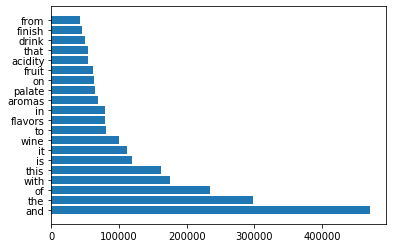

<Figure size 864x576 with 0 Axes>

In [45]:
# view the distribution of top words with stopwords
plt.barh(
    y = wine_common_stopwords["ReviewText"], 
    width = wine_common_stopwords["count"], 
)
plt.figure(figsize = (12, 8))

In [46]:
# Get the top unigrams after removing stop words

# Function to get the top words
def get_top_n_words_stop(description, n=None):
    vec = CountVectorizer(stop_words = "english").fit(description)
    bag_of_words = vec.transform(description)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [47]:
common_nostop_words = get_top_n_words_stop(wine_df["description"], 20)

In [48]:
# loop through our comon words and print them out
for word, freq in common_nostop_words:
    print(word, freq)

wine 99166
flavors 79467
aromas 68690
palate 64953
fruit 61794
acidity 54321
drink 50239
finish 44875
tannins 39663
black 37818
cherry 37559
ripe 34386
nose 30245
red 28437
white 26953
notes 24376
spice 23995
oak 23128
apple 22983
berry 21712


In [49]:
# Create a dataframe that will contain these words
wine_common_no_stopwords = pd.DataFrame(common_nostop_words, columns = ['ReviewText' , 'count'])
wine_common_no_stopwords.head()

,ReviewText,count
0,wine,99166
1,flavors,79467
2,aromas,68690
3,palate,64953
4,fruit,61794


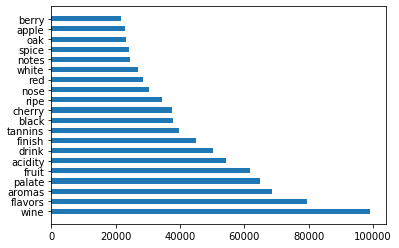

<Figure size 864x576 with 0 Axes>

In [51]:
# view the distribution of top words without stopwords
plt.barh(
    y = wine_common_no_stopwords["ReviewText"], 
    width = wine_common_no_stopwords["count"], 
    height = .5
)
plt.figure(figsize = (12, 8))
plt.show()

# Distribution of Top Bigrams for Description

In [52]:
# View the top bigrams without stop words

# Function to get the top words
def get_top_n_bigrams(description, n=None):
    vec = CountVectorizer(ngram_range = (2, 2), stop_words = "english").fit(description)
    bag_of_words = vec.transform(description)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
common_nostop_bigrams = get_top_n_bigrams(wine_df["description"], 20)

In [54]:
# loop through our comon words and print them out
for word, freq in common_nostop_bigrams:
    print(word, freq)

loaded finesse 15304
black cherry 10643
fruit flavors 10000
white pepper 8670
bright acidity 7915
palate delivers 7729
opens aromas 7026
cabernet sauvignon 6561
palate offers 5744
acidity keeps 5589
racy acidity 5533
aromas carry 5515
ready drink 5513
vibrant palate 5469
lemon drop 5406
complexity drink 5364
mineral driven 5296
medium bodied 5253
drink 2027 5228
tomato vine 5206


In [55]:
# Create a dataframe that will contain these words
wine_common_bigrams = pd.DataFrame(common_nostop_bigrams, columns = ['ReviewText' , 'count'])
wine_common_bigrams.head()

,ReviewText,count
0,loaded finesse,15304
1,black cherry,10643
2,fruit flavors,10000
3,white pepper,8670
4,bright acidity,7915


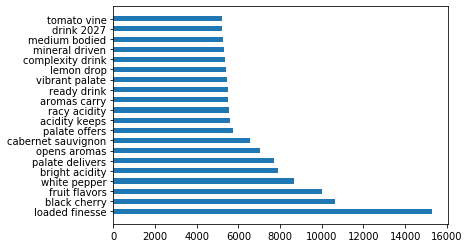

<Figure size 864x576 with 0 Axes>

In [57]:
# view the distribution of top words without stopwords
plt.barh(
    y = wine_common_bigrams["ReviewText"], 
    width = wine_common_bigrams["count"], 
    height = .5
)
plt.figure(figsize = (12, 8))
plt.show()

# Distribution of Top Trigrams for Description

In [58]:
# View the top trigrams without stop words

# Function to get the top words
def get_top_n_trigrams(description, n=None):
    vec = CountVectorizer(ngram_range = (3, 3), stop_words = "english").fit(description)
    bag_of_words = vec.transform(description)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [59]:
common_nostop_trigrams = get_top_n_trigrams(wine_df["description"], 20)

In [60]:
# loop through our comon words and print them out
for word, freq in common_nostop_trigrams:
    print(word, freq)

alongside racy acidity 5145
vibrant palate delivers 5134
white opens aromas 5115
crushed tomato vine 5114
develop complexity drink 5111
classic varietal aromas 5099
bright acidity keeps 5097
palate white pepper 5083
acidity keeps balanced 5082
vibrant focused palate 5067
fragrant loaded finesse 5067
mineral driven white 5067
keeps balanced drink 5065
aromas carry vibrant 5063
white pepper fennel 5063
honey aromas carry 5063
tomato vine whiff 5060
loaded finesse bright 5060
freshly mowed grass 5060
offers classic varietal 5060


In [61]:
# Create a dataframe that will contain these words
wine_common_trigrams = pd.DataFrame(common_nostop_trigrams, columns = ['ReviewText' , 'count'])
wine_common_trigrams.head()

,ReviewText,count
0,alongside racy acidity,5145
1,vibrant palate delivers,5134
2,white opens aromas,5115
3,crushed tomato vine,5114
4,develop complexity drink,5111


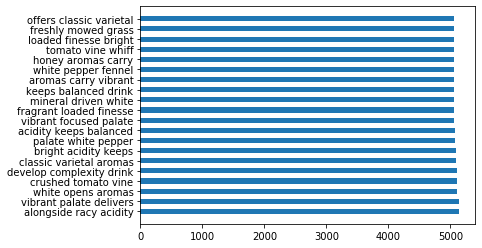

<Figure size 864x576 with 0 Axes>

In [63]:
# view the distribution of top words without stopwords
plt.barh(
    y = wine_common_trigrams["ReviewText"], 
    width = wine_common_trigrams["count"], 
    height = .5
)
plt.figure(figsize = (12, 8))
plt.show()

# Finding Characterisitc terms and their associations

In [64]:
# Characteristic terms for Description and Country
country_characteristic = st.CorpusFromPandas(
    wine_df, 
    category_col = "country", 
    text_col = "description", 
    nlp = nlp
).build()

In [65]:
# Get the top 20 words that differentiate the review from a general English Corpus
print(list(country_characteristic.get_scaled_f_scores_vs_background().index[:15]))

['aromas', 'flavors', 'palate', 'acidity', 'tannins', 'ripe', 'finesse', 'fruit', 'bodied', 'plum', 'cherry', 'nose', 'spice', 'savory', 'wine']


In [66]:
# Get the term frequency for any country
term_freq_us_df = country_characteristic.get_term_freq_df()

In [67]:
# Create a new column with the frequency for United States and France
term_freq_us_df["US"] = country_characteristic.get_scaled_f_scores("US")
term_freq_us_df["France"] = country_characteristic.get_scaled_f_scores("France")
term_freq_us_df.head()

,Portugal freq,US freq,Spain freq,Italy freq,France freq,Germany freq,Argentina freq,Chile freq,Australia freq,Austria freq,...,Switzerland freq,Bosnia and Herzegovina freq,Ukraine freq,Slovakia freq,Macedonia freq,China freq,Kosovo freq,Global freq,US,France
term,,,,,,,,,,,,,,,,,,,,,
this,7281,63746,8448,30805,27881,2733,3975,4618,2897,3503,...,20,2,16,0,12,6,14,2,0.099152,0.866476
is,9456,43239,6994,7674,31503,1130,3619,4542,2551,4215,...,17,1,13,1,4,7,6,3,0.086613,0.914870
ripe,2924,10701,1154,4434,10437,584,671,567,467,1366,...,1,1,2,0,1,0,1,0,0.068789,0.931090
and,14364,196289,29584,92940,56964,8265,15797,18313,8327,9656,...,48,9,36,2,31,16,39,7,0.109136,0.086410
fruity,1474,3335,265,383,4613,444,133,166,96,328,...,0,0,0,0,4,0,0,0,0.061724,0.960106


In [68]:
# view the most common words associated to the US and France country
print("Top 15 US wine terms")
pprint(list(term_freq_us_df.sort_values(by="US", ascending = False).index[:15]))
print("Top 15 France wine terms")
pprint(list(term_freq_us_df.sort_values(by="France", ascending = False).index[:15]))

Top 15 US wine terms
['the sip',
 'petite sirah',
 'sirah',
 'zinfandel',
 'petite',
 'show on',
 'meet',
 'new french',
 'this bottling',
 'meet with',
 '% new',
 'california',
 "winery 's",
 'the winery',
 'bottling from']
Top 15 France wine terms
['champagne',
 'cru',
 'from 2022',
 'from 2021',
 'be ready',
 'saint',
 'from 2020',
 'drink from',
 'mineral texture',
 'yellow fruits',
 'from 2019',
 'château',
 'developing',
 'from late',
 'from 2017']


In [ ]:
# # Visualizing term associations
# html = st.produce_scattertext_explorer(
#     country_characteristic,
#     category = "US",
#     category_name = "United States",
#     not_category_name = "Non United States",
#     width_in_pixels = 1000,
#     metadata = wine_df["variety"]
# )
# file_name = 'testing.html'
# open(file_name, 'wb').write(html.encode('utf-8'))
# IFrame(src=file_name, width = 1200, height=700)

In [ ]:
# what you need to install for scattertext and spacy
# ! pip install scattertext
# ! pip install spacy
# ! python -m spacy download en_core_web_md
# ! python -m spacy download en_core_web_sm